# Basic Deep Learning - Digits Recognizer using Simple CNN

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

# Setup

In [3]:
import numpy as np
import os
import sys

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

2.8.0


# Load Dataset



In [38]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


Label: [1]
Data array [[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


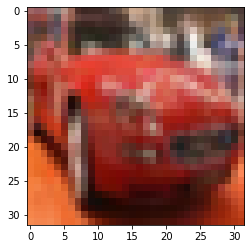

In [39]:
import matplotlib.pyplot as plt

plt.imshow(train_images[5])
print('Label:', train_labels[5])
print('Data array', train_images[5])

In [40]:
# Normalize pixel values to be between 0 and 1

train_images, test_images = train_images / 255.0, test_images / 255.0

In [41]:
print('Data array', train_images[5])

Data array [[[0.62352941 0.4        0.39607843]
  [0.58823529 0.35686275 0.37254902]
  [0.6        0.37254902 0.38039216]
  ...
  [0.35686275 0.27843137 0.21960784]
  [0.29019608 0.24705882 0.21568627]
  [0.29803922 0.22745098 0.21568627]]

 [[0.55686275 0.29411765 0.26666667]
  [0.57254902 0.28235294 0.25882353]
  [0.60784314 0.29803922 0.25490196]
  ...
  [0.49803922 0.41176471 0.27843137]
  [0.47843137 0.43529412 0.36470588]
  [0.3372549  0.27058824 0.23921569]]

 [[0.42745098 0.2627451  0.29411765]
  [0.38823529 0.22745098 0.23529412]
  [0.41176471 0.23137255 0.20392157]
  ...
  [0.5372549  0.43921569 0.31372549]
  [0.63921569 0.51764706 0.41176471]
  [0.36470588 0.28235294 0.27843137]]

 ...

 [[0.95686275 0.50588235 0.2745098 ]
  [0.94117647 0.48235294 0.25490196]
  [0.94509804 0.47843137 0.25490196]
  ...
  [0.61176471 0.16470588 0.05882353]
  [0.70196078 0.23137255 0.10196078]
  [0.78431373 0.28627451 0.14117647]]

 [[0.96470588 0.52156863 0.29019608]
  [0.95294118 0.50196078 0

ValueError: ignored

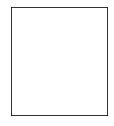

In [44]:
plt.figure(figsize=(10,2))

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

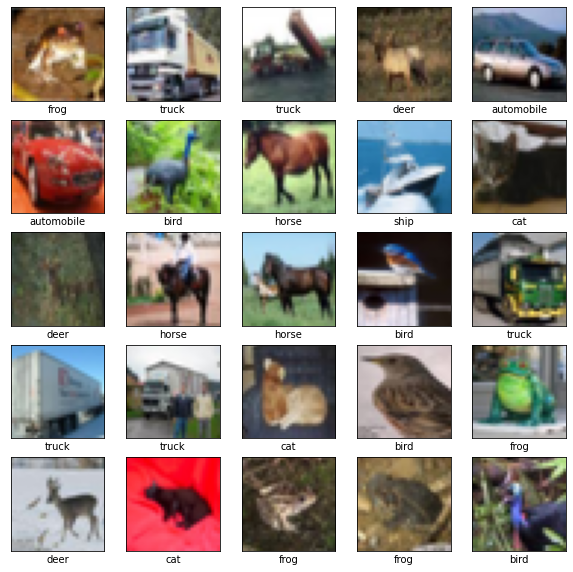

In [45]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build the Model

<img src="https://miro.medium.com/proxy/1*KCpy3xvBTeX5xTRwB1baCA.gif" width="500px">

<img src="https://i0.wp.com/developersbreach.com/wp-content/uploads/2020/08/cnn_banner.png?fit=1400%2C658&ssl=1" width="700px">

In [64]:
model = models.Sequential() # urutan jaringan NN

# layers untuk ekstraksi fitur
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))   # layer dengan 32 filter konvolusi yang digunakan masing-masing 3x3
model.add(layers.MaxPooling2D((2, 2)))                                             # layer untuk memilih fitur paling baik
model.add(layers.Dropout(0.25))                                                    # kita matikan beberapa neuron secara acak untuk meningkatkan konvergensi
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# layers untuk klasifikasi (fully connected layers)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))                                    # hidden layer
model.add(layers.Dense(64, activation='relu'))  
model.add(layers.Dense(10, activation='softmax'))                                  # output layer dengan fungsi aktivasi softmax

In [65]:
# Compile the Model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [66]:
%%time
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 9s 5ms/step - loss: 1.6735 - accuracy: 0.3788
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3379 - accuracy: 0.5174
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2097 - accuracy: 0.5650
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1358 - accuracy: 0.5945
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0846 - accuracy: 0.6173
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0461 - accuracy: 0.6305
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0114 - accuracy: 0.6422
Epoch 8/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9851 - accuracy: 0.6498
Epoch 9/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9639 - accuracy: 0.6572
Epoch 10/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9400 - accurac

In [67]:
model.evaluate(test_images, test_labels)

 15/313 [>.............................] - ETA: 1s - loss: 0.7366 - accuracy: 0.7375 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 3ms/step - loss: 0.7331 - accuracy: 0.7446


[0.7331073880195618, 0.7445999979972839]